# 8. Check equal-area projection

In [1]:
%matplotlib inline

In [2]:
from cpe_help.tiger import get_tiger
from cpe_help.util import crs

tiger = get_tiger()
df = tiger.load_state_boundaries()
df = df.iloc[:1]
df = df.to_crs({'init': 'esri:102005'})  # just a random projection
df

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265597146,489902816,+38.6472854,-080.6183274,POLYGON ((-6128768.035681799 7275607.897696841...


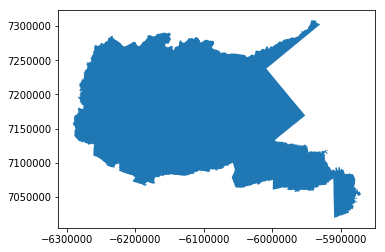

In [3]:
df.plot()

In [4]:
proj = crs.equal_area_from_geodf(df)
df = df.to_crs(proj)
df

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265597146,489902816,+38.6472854,-080.6183274,POLYGON ((-117874.2969239168 34183.23987637906...


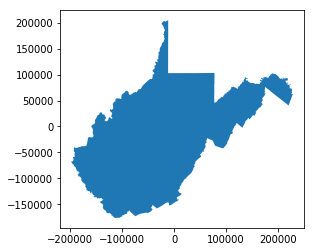

In [5]:
df.plot()

In [6]:
found_area = df.area[0]
expected_area = (df.ALAND + df.AWATER)[0]
error = found_area - expected_area

# that's smaller than a square with side 73m
print(f" Area error for West Virginia: {error:.2f} m^2")

 Area error for West Virginia: 5284.35 m^2
